In [91]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import emoji


In [92]:
# Emoji descriptions and corresponding emojis
emoji_meanings = {
    "smile": "😊",
    "sad": "😢",
    "heart": "❤️",
    "fire": "🔥",
    "thumbs up": "👍",
    "star": "⭐",
    "clap": "👏",
    "thinking": "🤔",
    "laugh": "😂",
    "crying": "😭"
}

emojis =[" 😊 ", " 😢 ", " ❤️ ", " 🔥 ", " 👍 ", " ⭐ ", " 👏 ", " 🤔 ", " 😂 ", " 😭 "]
#model.resize_token_embeddings(len(tokenizer))


In [93]:
# Load pre-trained BERT tokenizer and model
model = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModel.from_pretrained(model)
tokenizer.add_tokens(emojis)
model.resize_token_embeddings(len(tokenizer))

Embedding(30532, 768, padding_idx=0)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


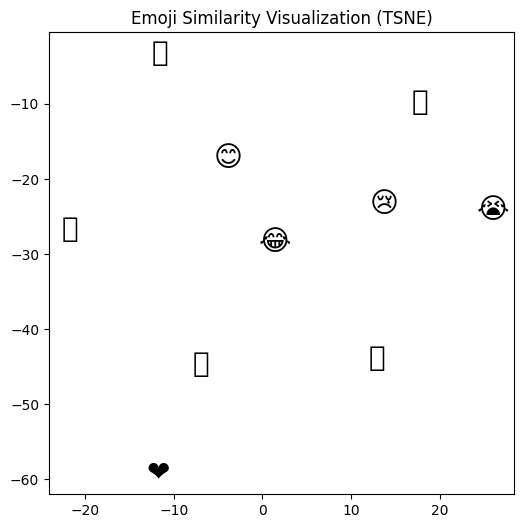

In [96]:
# Generate embeddings for the new tokens
def get_token_embedding(token):
    inputs = tokenizer(token, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the CLS token embedding as the representation
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Collect embeddings for all emoji meanings
embeddings = []
labels = []
for emoji, meaning in emoji_meanings.items():
    embedding = get_token_embedding(emoji)
    embeddings.append(embedding)
    labels.append(meaning)

# Convert embeddings to a numpy array
import numpy as np
embeddings = np.array(embeddings)

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
#embeddings_2d = pca.fit_transform(embeddings)  # Shape: (num_emojis, 2)
embeddings_2d = TSNE(n_components=2, random_state=12, perplexity=3).fit_transform(embeddings)
# Plot the emojis
plt.figure(figsize=(6, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0)
for i, label in enumerate(labels):
    x, y = embeddings_2d[i]
    plt.text(x, y, label, fontsize=20, ha='center', va='center')
plt.title("Emoji Similarity Visualization (TSNE)", fontsize=12)
plt.axis("on")

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


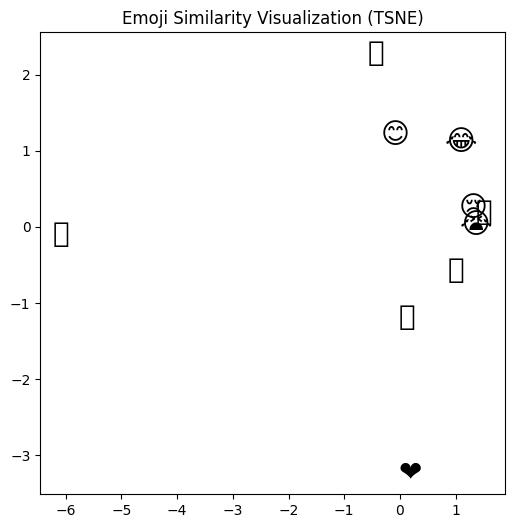

In [97]:
# Generate embeddings for the new tokens
def get_token_embedding(token):
    inputs = tokenizer(token, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    # Use the CLS token embedding as the representation
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Collect embeddings for all emoji meanings
embeddings = []
labels = []
for emoji, meaning in emoji_meanings.items():
    embedding = get_token_embedding(emoji)
    embeddings.append(embedding)
    labels.append(meaning)

# Convert embeddings to a numpy array
import numpy as np
embeddings = np.array(embeddings)

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)  # Shape: (num_emojis, 2)
#mbeddings_2d = TSNE(n_components=2, random_state=12, perplexity=3).fit_transform(embeddings)
# Plot the emojis
plt.figure(figsize=(6, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0)
for i, label in enumerate(labels):
    x, y = embeddings_2d[i]
    plt.text(x, y, label, fontsize=20, ha='center', va='center')
plt.title("Emoji Similarity Visualization (TSNE)", fontsize=12)
plt.axis("on")

plt.show()